In [1]:
from dataset import NAIPGeo
import matplotlib.pyplot as plt

In [2]:
ds = NAIPGeo(root="data/")

In [3]:
ds[0]

{'image': tensor([[[117, 134, 141,  ...,  32,  66,  60],
          [ 91, 100, 102,  ...,  43,  43,  48],
          [ 95,  83,  71,  ...,  67,  60,  62],
          ...,
          [ 44,  56,  50,  ..., 105, 117, 119],
          [ 45,  67,  73,  ...,  82, 115, 113],
          [ 45,  56,  82,  ...,  59, 111, 116]],
 
         [[112, 124, 133,  ...,  32,  65,  76],
          [ 82,  90,  92,  ...,  46,  41,  50],
          [ 83,  76,  62,  ...,  66,  55,  60],
          ...,
          [ 43,  57,  62,  ...,  96, 110, 111],
          [ 46,  67,  81,  ...,  73, 103, 105],
          [ 48,  58,  89,  ...,  53, 102, 107]],
 
         [[ 95, 105, 113,  ...,  33,  48,  44],
          [ 73,  78,  82,  ...,  44,  40,  41],
          [ 74,  69,  60,  ...,  59,  52,  52],
          ...,
          [ 38,  50,  47,  ...,  80,  88,  89],
          [ 41,  59,  68,  ...,  62,  85,  87],
          [ 41,  49,  75,  ...,  51,  85,  88]],
 
         [[141, 159, 167,  ...,  46, 118, 181],
          [114, 128, 116,

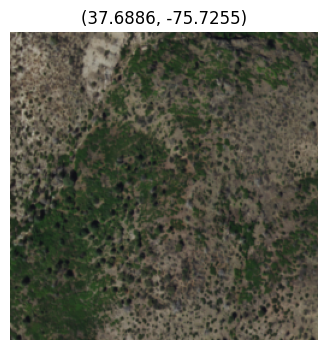

In [4]:
ds.plot(ds[0], show_titles=True)
plt.show()
plt.close()